# Load the CSV DataSet with Pandas:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.utils import resample



df = pd.read_csv('data.csv')
df = df.sample(frac=1, random_state=42)
df


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
994,28477,30,Male,6,Media,6513,Fair,Very High,High,0,...,0,Senior,Small,62,No,No,No,Good,Low,Left
1790,29733,41,Female,9,Finance,10007,Poor,Medium,Average,2,...,6,Entry,Medium,22,Yes,No,No,Excellent,Low,Stayed
3855,24622,44,Female,9,Healthcare,7055,Poor,Medium,High,3,...,3,Entry,Small,59,No,No,No,Poor,Very High,Left
6593,1864,18,Female,4,Healthcare,7591,Fair,High,High,0,...,3,Senior,Small,61,Yes,No,No,Good,Medium,Stayed
7584,23946,41,Female,3,Healthcare,6995,Fair,Very High,Average,1,...,4,Senior,Large,80,Yes,No,No,Good,Low,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,40860,29,Male,5,Healthcare,8043,Good,Low,Average,0,...,0,Entry,Small,72,No,No,No,Good,High,Left
5191,72451,52,Male,40,Education,4533,Fair,Low,Average,2,...,1,Mid,Large,93,No,No,Yes,Good,Medium,Stayed
5390,16888,45,Male,3,Technology,7666,Fair,High,Average,0,...,0,Mid,Small,10,No,No,Yes,Good,Low,Left
860,56431,39,Male,2,Finance,4814,Good,Medium,Average,2,...,2,Mid,Medium,74,No,Yes,No,Good,Low,Left


## Feature Extraction and Transformation: Converting Data to Numeric:


In [2]:
# Remove the 'Employee ID' column
df = df.drop(columns=['Employee ID'])

# Label encode binary columns
binary_columns = [
    'Gender', 'Overtime', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities', 'Attrition'] 

# label encode the numeric columns
numeric_cols = [
    'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
    'Distance from Home', 'Number of Dependents',
    'Company Tenure'] 

# label encode the categorical columns
categorical_columns = [
    'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 
    'Education Level', 'Marital Status', 'Job Level', 'Company Size', 
    'Company Reputation', 'Employee Recognition'
]

label_encoder = LabelEncoder()

for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# change every 0 to -1:    
df['Attrition'] = df['Attrition'].replace({0: -1, 1: 1})

# Label encode other categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols]).round(3)

df

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
994,-0.711,1,-0.856,3,-0.378,1,3,2,-0.834,0,...,-1.063,2,2,0.240,0,0,0,2,1,-1
1790,0.198,0,-0.590,1,1.249,3,2,0,1.171,0,...,2.791,0,1,-1.329,1,0,0,0,1,1
3855,0.446,0,-0.590,2,-0.126,3,2,2,2.174,0,...,0.864,0,2,0.122,0,0,0,3,3,-1
6593,-1.702,0,-1.033,2,0.124,1,0,2,-0.834,1,...,0.864,2,2,0.201,1,0,0,2,2,1
7584,0.198,0,-1.122,2,-0.154,1,3,0,0.168,0,...,1.506,2,0,0.946,1,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.793,1,-0.944,2,0.334,2,1,0,-0.834,1,...,-1.063,0,2,0.632,0,0,0,2,0,-1
5191,1.107,1,2.157,0,-1.301,1,1,0,1.171,0,...,-0.420,1,0,1.456,0,0,1,2,2,1
5390,0.529,1,-1.122,4,0.159,1,0,0,-0.834,0,...,-1.063,1,2,-1.800,0,0,1,2,1,-1
860,0.033,1,-1.210,1,-1.170,2,2,0,1.171,0,...,0.222,1,1,0.711,0,1,0,2,1,-1


# separate to X and y:

In [3]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

# find the k most important features:

In [4]:
# This function selects features based on their mutual information scores.
def mi_feature_selection(X, y, num_of_features):
    mi = mutual_info_classif(X, y, random_state=42)
    mi_sorted_indices = np.argsort(mi)[::-1]
    return mi_sorted_indices[:num_of_features]

Selected feature indices: [14 12 17  5 13  2  6  9  0  8]
Number of features: 5, F1 score: 0.6895
Number of features: 10, F1 score: 0.7049
Number of features: 15, F1 score: 0.7008
Number of features: 20, F1 score: 0.7203
Number of features: 23, F1 score: 0.7178


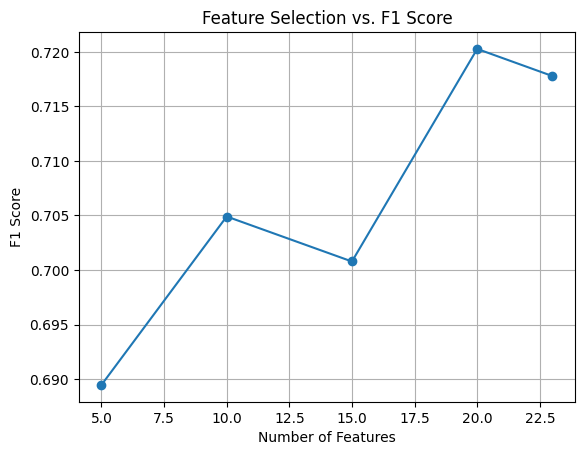

In [5]:

# Function to evaluate feature sets using F1 score
def evaluate_feature_sets(X, y, feature_counts):
    results = []
    
    for num_features in feature_counts:
        # Select features using MI
        selected_indices_mi = mi_feature_selection(X, y, num_features)
        
        if num_features == 10:
            print(f"Selected feature indices: {selected_indices_mi}")
                        
        # Filter the features based on selected indices
        X_selected = X[:, selected_indices_mi]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
        
        # Train a model
        model = LogisticRegression() 
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_test_pred = model.predict(X_test)
        
        # Evaluate the model using F1 score
        f1 = f1_score(y_test, y_test_pred, average='macro')
        results.append((num_features, f1))
    
    return results

# Define the range of number of features to test
feature_counts = [5, 10, 15, 20, 23]

# Evaluate different feature sets
results = evaluate_feature_sets(X, y, feature_counts)

# Print results
for num_features, f1 in results:
    print(f"Number of features: {num_features}, F1 score: {f1:.4f}")


num_features_list, f1_scores = zip(*results)
plt.plot(num_features_list, f1_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Feature Selection vs. F1 Score')
plt.grid(True)
plt.show()


In [6]:
# Select 10 features using MI
selected_features_mi = mi_feature_selection(X, y, 10)
print("Selected features (MI):", selected_features_mi)

X_selected = X[:, selected_features_mi]


Selected features (MI): [14 12 17  5 13  2  6  9  0  8]


# split the data to Train , Validation and Test

In [7]:

# Split into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1,shuffle=True, random_state=42)

# 5-Fold cross validation:

In [8]:
# Set up KFold with 5 splits
kf = KFold(n_splits=5)

# Create a list to hold all trained models
models = []
# Create an array to hold all predictions for each fold
all_predictions = np.zeros((len(X_train), kf.n_splits)) 
validation_scores = []

# Loop over each fold
for fold_index, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train Decision Tree model on the train fold
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train_fold, y_train_fold)

    # Store the model
    models.append(model)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)
    validation_score = f1_score(y_val_fold, y_val_pred, average='macro')
    validation_scores.append(validation_score)

    # Predict on the entire X_train and store the predictions
    y_train_pred = model.predict(X_train)
    all_predictions[:, fold_index] = y_train_pred  # Store predictions for current model

# Calculate the average validation score
average_validation_score = np.mean(validation_scores)
print(f'Average model performance: {average_validation_score}' + '\n')

# Step 1: Create a new y (y_new) based on the majority vote across all models
y_new = stats.mode(all_predictions, axis=1)[0].ravel()

# Step 2: Train a final model on the entire X_train with the new y (y_new)
final_model_k_fold = DecisionTreeClassifier(max_depth=5)
final_model_k_fold.fit(X_train, y_new)

# Predict on the test set
y_test_pred = final_model_k_fold.predict(X_test)

# Calculate accuracy on the test set 
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy of the final model:", test_accuracy)
f1_score_k_fold = f1_score(y_test, y_test_pred, average='macro')
print(f"F1 score of the final model on the test set: {f1_score_k_fold}" + '\n')

# Predict on the train set
y_train_pred = final_model_k_fold.predict(X_train)

#calculate accuracy on the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy of the final model:", train_accuracy)
f1_score_train = f1_score(y_train, y_train_pred, average='macro')
print("F1 score of the final model on the train set:", f1_score_train)



Average model performance: 0.7038047538803067

Test accuracy of the final model: 0.7027624309392265
F1 score of the final model on the test set: 0.7016199507531049

Train accuracy of the final model: 0.7173058013765978
F1 score of the final model on the train set: 0.7160735094193047


# Bagging on 50% of the Train:

In [9]:
n_models = 5

# Create a list to hold all trained models
models = []
# Create an array to hold all predictions for each model
all_predictions = np.zeros((len(X_train), n_models))  # array to hold predictions for each model

validation_scores = []

# Loop to create multiple models with 50% random train splits
for model_index in range(n_models):
    # Randomly split the training data into 50% training and 50% validation
    X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train, y_train, test_size=0.5, random_state=model_index)
    
    # Train logistic regression model on the train split
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train_fold, y_train_fold)

    # Store the model
    models.append(model)

    y_val_pred = model.predict(X_val_fold)
    validation_score = f1_score(y_val_fold, y_val_pred, average='macro')
    validation_scores.append(validation_score)
    
    # Predict on the entire X_train and store the predictions
    y_train_pred = model.predict(X_train)
    all_predictions[:, model_index] = y_train_pred  # Store predictions for current model

# Calculate the average validation score
average_validation_score = np.mean(validation_scores)
print(f'Average model performance: {average_validation_score}' + '\n')

# Step 1: Create a new y (y_new) based on the majority vote across all models
y_new = stats.mode(all_predictions, axis=1)[0].ravel()

# Step 2: Train a final model on the entire X_train with the new y (y_new)
final_model_bagging = DecisionTreeClassifier(max_depth=5)
final_model_bagging.fit(X_train, y_new)


# Optional: Predict on the test set
y_test_pred = final_model_bagging.predict(X_test)

# Calculate accuracy on the test set 
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy of the final model:", test_accuracy)
f1_score_bagging = f1_score(y_test, y_test_pred, average='macro')
print(f"F1 score of the final model on the test set: {f1_score_bagging}" + '\n')

# Predict on the train set
y_train_pred = final_model_bagging.predict(X_train)

#calculate accuracy on the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy of the final model:", train_accuracy)
f1_score_train = f1_score(y_train, y_train_pred, average='macro')
print("F1 score of the final model on the train set:", f1_score_train)


Average model performance: 0.7073091360715754

Test accuracy of the final model: 0.6961325966850829
F1 score of the final model on the test set: 0.6957522056819001

Train accuracy of the final model: 0.7084562438544739
F1 score of the final model on the train set: 0.7082764178906296


# AdaBoost with Decision trees:

In [10]:
def generate_5_models(T, depth):
    random_state = [100, 13, 300, 589, 46]
    adaboost_models = []
    for i in range(T):
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.8, random_state=random_state[i])

        # Initialize and fit the decision tree on the subset
        tree = DecisionTreeClassifier(max_depth=depth)
        tree.fit(X_train_subset, y_train_subset)
        adaboost_models.append(tree)
    return adaboost_models


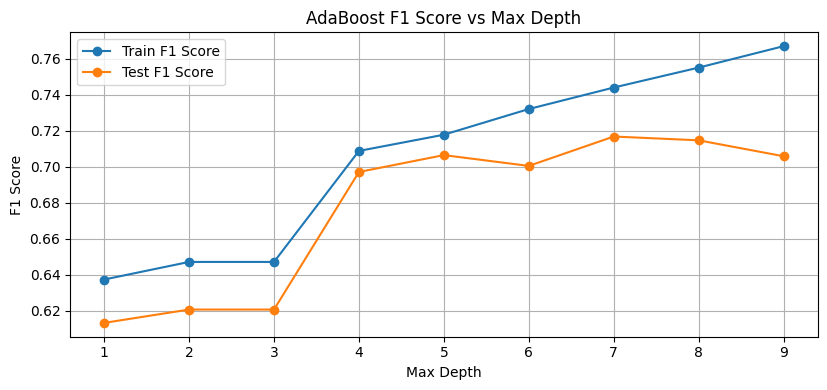

In [11]:
# Initialize the weights to 1/m where m is the number of samples.
def initialize_weights(m):
    return np.ones(m) / m

# Calculate the weighted error of a model.
def calculate_weighted_error(y_train, y_pred, weights):
    return np.sum(weights * (y_train != y_pred)) 

# Calculate the alpha value for a model based on its weighted error.
def calculate_alpha(error):   
    return 0.5 * np.log((1 - error) / error)

# Update the weights of the samples.
def update_weights(weights, y_train, y_pred, error):
    new_weights = np.copy(weights)
    # Update weights for correct predictions
    correct_indices = y_train == y_pred
    new_weights[correct_indices] = weights[correct_indices] / (2 * (1 - error))
    # Update weights for incorrect predictions
    incorrect_indices = y_train != y_pred
    new_weights[incorrect_indices] = weights[incorrect_indices] / (2 * error)
    return new_weights


# Implement the AdaBoost algorithm.
def adaboost(X_train, y_train, adaboost_models, T):
    m = len(y_train)
    weights = initialize_weights(m)
    H = []
    alphas = []
    # Create a copy of the models list to work on
    adaboost_models_copy = adaboost_models.copy()
    prev_error = 0

    for _ in range(T):
        # Step 1: Find the best model based on weighted error
        best_model = None
        best_error = np.inf
        best_pred = None

        for model in adaboost_models_copy:
            y_pred = model.predict(X_train)
            error = calculate_weighted_error(y_train, y_pred, weights)
                        
            if error == 0: 
                break

            if error < best_error:
                best_error = error
                best_model = model
                best_pred = y_pred

        #Remove the selected model from the copy       
        adaboost_models_copy.remove(best_model)
        
        # Step 2: Calculate alpha (expertise level)
        alpha = calculate_alpha(best_error)

        # Step 3: Store the best model and alpha
        H.append(best_model)
        alphas.append(alpha)

        
        if best_error - prev_error < 0.01:
            return H, alphas
        
        prev_error = best_error
        # Step 4: Update weights using the Xt error
        weights = update_weights(weights, y_train, best_pred, best_error)
       

    return H, alphas

# Make predictions using the trained AdaBoost model.
def predict_adaboost(X, H, alphas):
    final_pred = np.zeros(X.shape[0])
    for alpha, classifier in zip(alphas, H):
        pred = classifier.predict(X)
        final_pred += alpha * pred

    return np.sign(final_pred)

# Function to train and evaluate AdaBoost with varying max_depths
def evaluate_adaboost_on_depths(X_train, X_test, y_train, y_test, T, max_depths):

    train_f1_scores = []
    test_f1_scores = []
    five_models_with_depth_7 = []   

    for depth in max_depths:
        adaboost_models = generate_5_models(T, depth)
        if depth == 7:
            five_models_with_depth_7 = adaboost_models
        H, alphas = adaboost(X_train, y_train, adaboost_models, T)

        # Predict on training data
        y_pred_on_train = predict_adaboost(X_train, H, alphas)
        train_f1_scores.append(f1_score(y_train, y_pred_on_train, average='macro'))

        # Predict on test data
        y_pred_on_test = predict_adaboost(X_test, H, alphas)
        test_f1_scores.append(f1_score(y_test, y_pred_on_test, average='macro'))

    return train_f1_scores, test_f1_scores, five_models_with_depth_7 

T = 5  
max_depths = range(1, 10)  # Test max_depth from 1 to 10
train_f1_scores, test_f1_scores, five_models_with_depth_7 = evaluate_adaboost_on_depths(X_train, X_test, y_train, y_test, T, max_depths)
# Visualize the results
plt.figure(figsize=(16, 4))

# Plot F1 score
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_f1_scores, label='Train F1 Score', marker='o')
plt.plot(max_depths, test_f1_scores, label='Test F1 Score', marker='o')
plt.title('AdaBoost F1 Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:

# Train AdaBoost model
H, alphas = adaboost(X_train, y_train, five_models_with_depth_7, T)

y_pred_on_train = predict_adaboost(X_train, H, alphas)

train_accuracy = accuracy_score(y_train, y_pred_on_train)
print(f"Train Accuracy with AdaBoost: {train_accuracy * 100:.2f}%")
f1_score_adaboost_train = f1_score(y_train, y_pred_on_train, average='macro')
print(f"F1 score on train with AdaBoost: {f1_score_adaboost_train * 100:.2f}%")

# Make predictions on the test set
y_pred = predict_adaboost(X_test, H, alphas)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with AdaBoost: {accuracy * 100:.2f}%")
f1_score_adaboost = f1_score(y_test, y_pred, average='macro')
print(f"F1 score on test with AdaBoost: {f1_score_adaboost * 100:.2f}%")


Train Accuracy with AdaBoost: 74.41%
F1 score on train with AdaBoost: 74.41%
Test Accuracy with AdaBoost: 71.71%
F1 score on test with AdaBoost: 71.69%
